**BERT (Bidirectional Encoder Representations from Transformers)**

---



It is a recent paper published by researchers at Google AI Language. It has caused a stir in the Machine Learning community by presenting state-of-the-art results in a wide variety of NLP tasks, including Question Answering (SQuAD v1.1), Natural Language Inference (MNLI), and others.

BERT’s key technical innovation is applying the bidirectional training of Transformer, a popular attention model, to language modelling. This is in contrast to previous efforts which looked at a text sequence either from left to right or combined left-to-right and right-to-left training. The paper’s results show that a language model which is bidirectionally trained can have a deeper sense of language context and flow than single-direction language models. In the paper, the researchers detail a novel technique named Masked LM (MLM) which allows bidirectional training in models in which it was previously impossible.

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.1 MB 5.3 MB/s 
     |████████████████████████████████| 596 kB 52.0 MB/s 
     |████████████████████████████████| 895 kB 47.5 MB/s 
     |████████████████████████████████| 3.3 MB 54.9 MB/s 
     |████████████████████████████████| 59 kB 6.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

**Dataset: SST2**


---


The dataset we will use in this example is SST2, which contains sentences from movie reviews, each labeled as either positive (has the value 1) or negative (has the value 0)

In [ ]:
df = pd.read_csv('https://github.com/clairett/pytorch-sentiment-classification/raw/master/data/SST2/train.tsv', delimiter='\t', header=None)
df.head()

,0,1
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1


In [ ]:
df=df[:2000]

In [ ]:
df[1].value_counts()

1    1041
0     959
Name: 1, dtype: int64

**Models: Sentence Sentiment Classification**


---


Our goal is to create a model that takes a sentence (just like the ones in our dataset) and produces either 1 (indicating the sentence carries a positive sentiment) or a 0 (indicating the sentence carries a negative sentiment). We can think of it as looking like this:
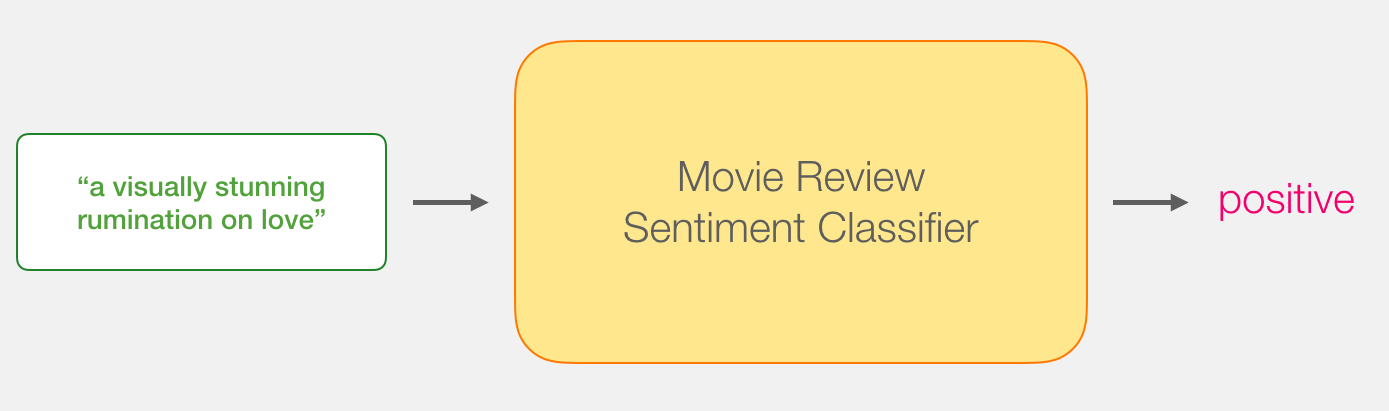

In [ ]:
# model_class,tokenizer_class,pretrained_weights=(ppb.DistilBertModel,ppb.DistilBertTokenizer,'distilbert-base-uncased')
## Want BERT instead of distilBERT? Uncomment the following line:
model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

Under the hood, the model is actually made up of two model.

*   DistilBERT processes the sentence and passes along some information it extracted from it on to the next model. DistilBERT is a smaller version of BERT developed and open sourced by the team at HuggingFace. It’s a lighter and faster version of BERT that roughly matches its performance.
*   The next model, a basic Logistic Regression model from scikit learn will take in the result of DistilBERT’s processing, and classify the sentence as either positive or negative (1 or 0, respectively).

The data we pass between the two models is a vector of size 768. We can think of this of vector as an embedding for the sentence that we can use for classification.

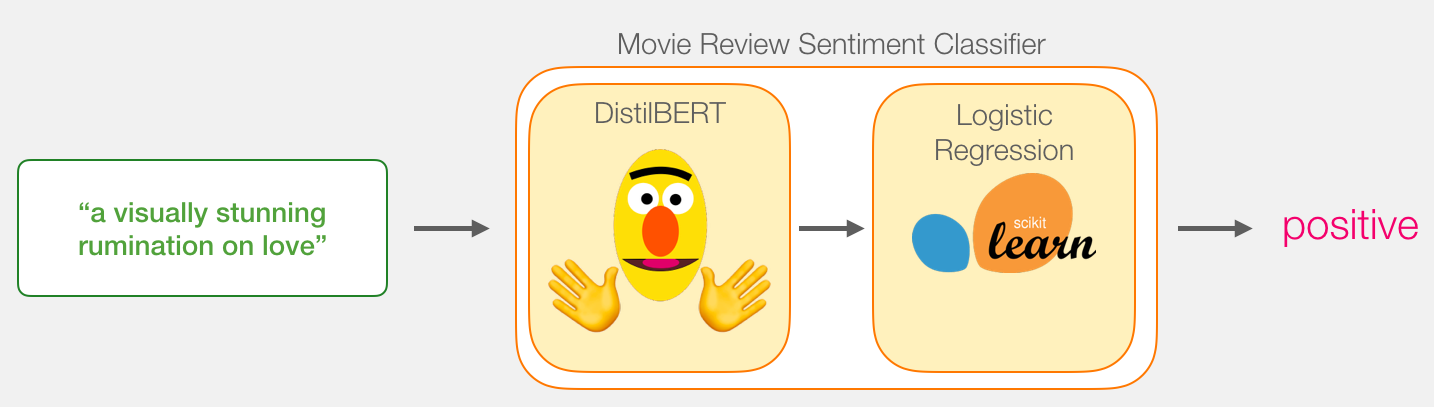

**Tutorial Overview**


---

 We will first use the trained distilBERT to generate sentence embeddings for 2,000 sentences.
 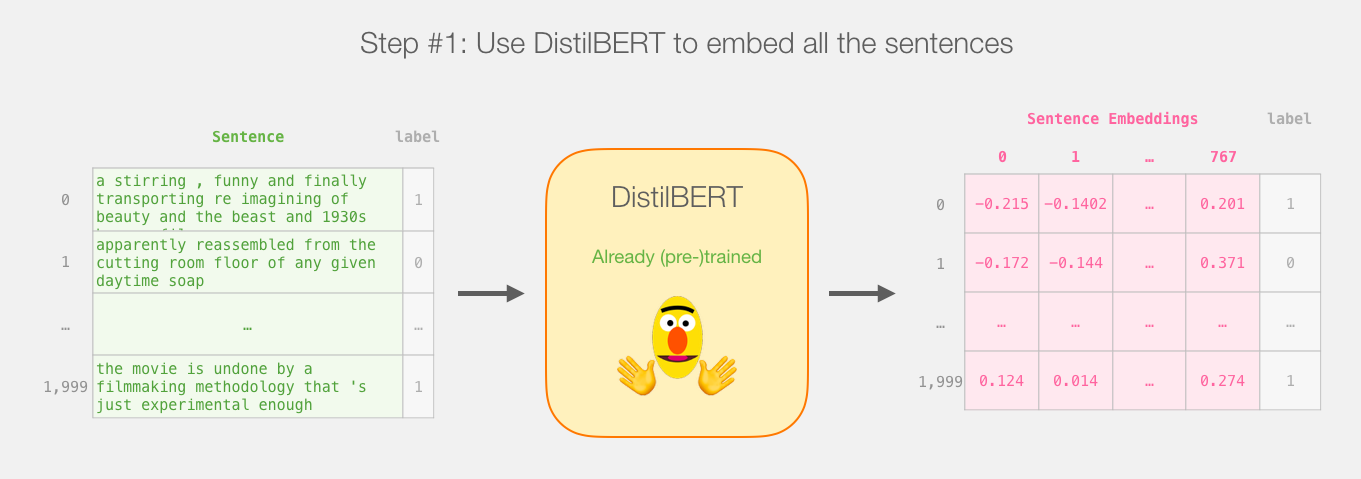

 We will not touch distilBERT after this step. It’s all Scikit Learn from here. We do the usual train/test split on this dataset:

 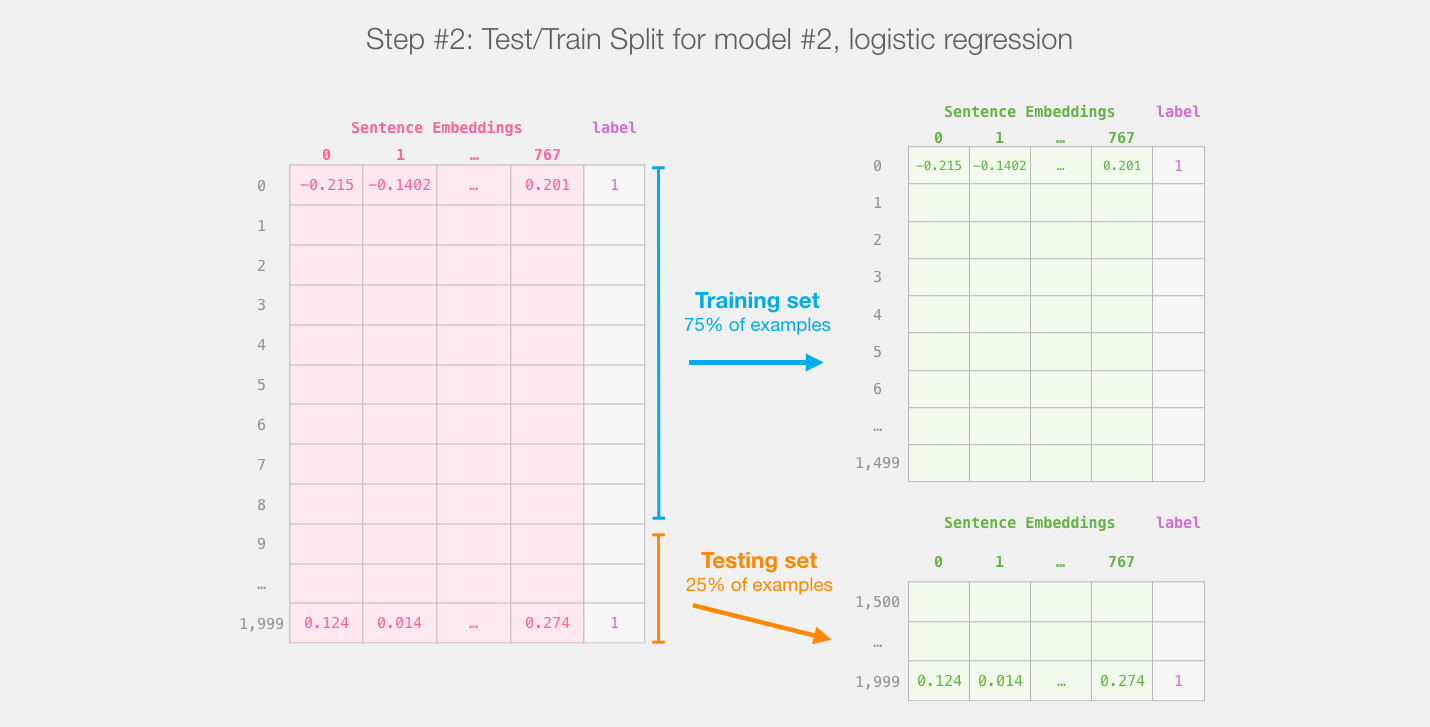



 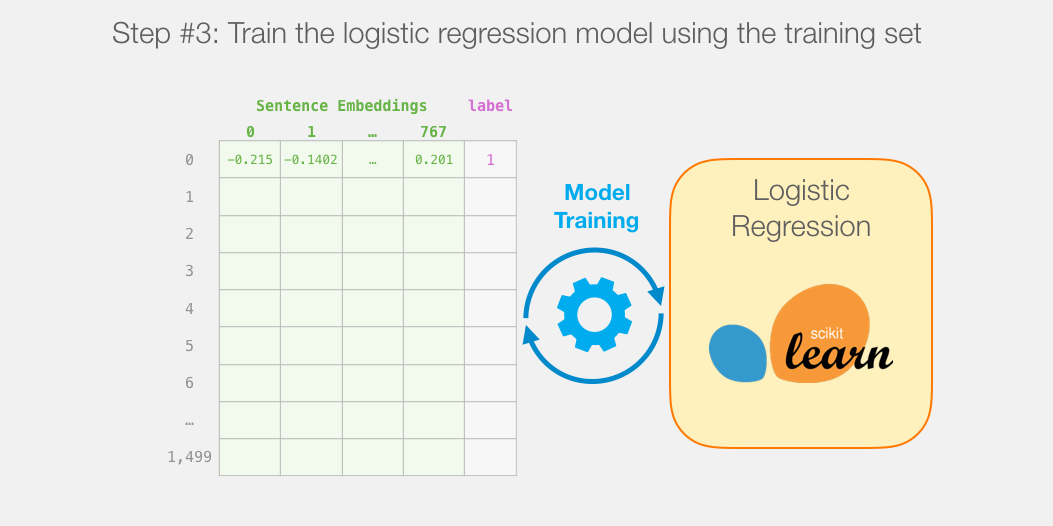


 

**How a single prediction is calculated**

---



Before we dig into the code and explain how to train the model, let’s look at how a trained model calculates its prediction.

Example : Let’s try to classify the sentence “a visually stunning rumination on love”. The first step is to use the BERT tokenizer to first split the word into tokens. Then, we add the special tokens needed for sentence classifications (these are [CLS] at the first position, and [SEP] at the end of the sentence).

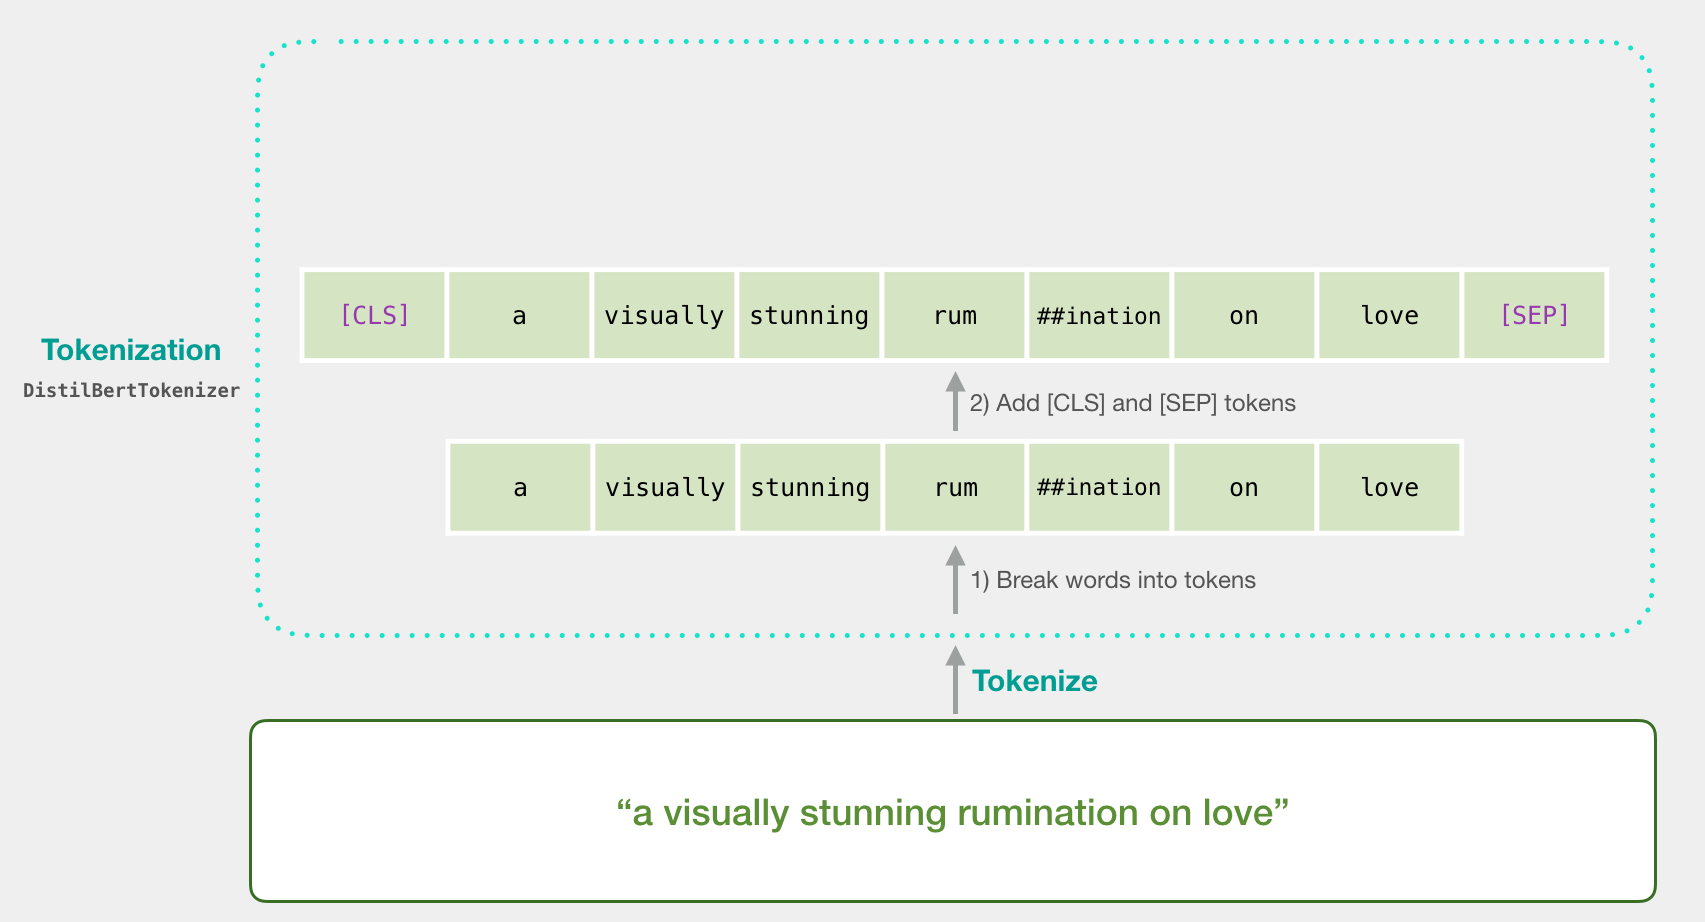

The third step the tokenizer does is to replace each token with its id from the embedding table which is a component we get with the trained model. Read The Illustrated Word2vec for a background on word embeddings.

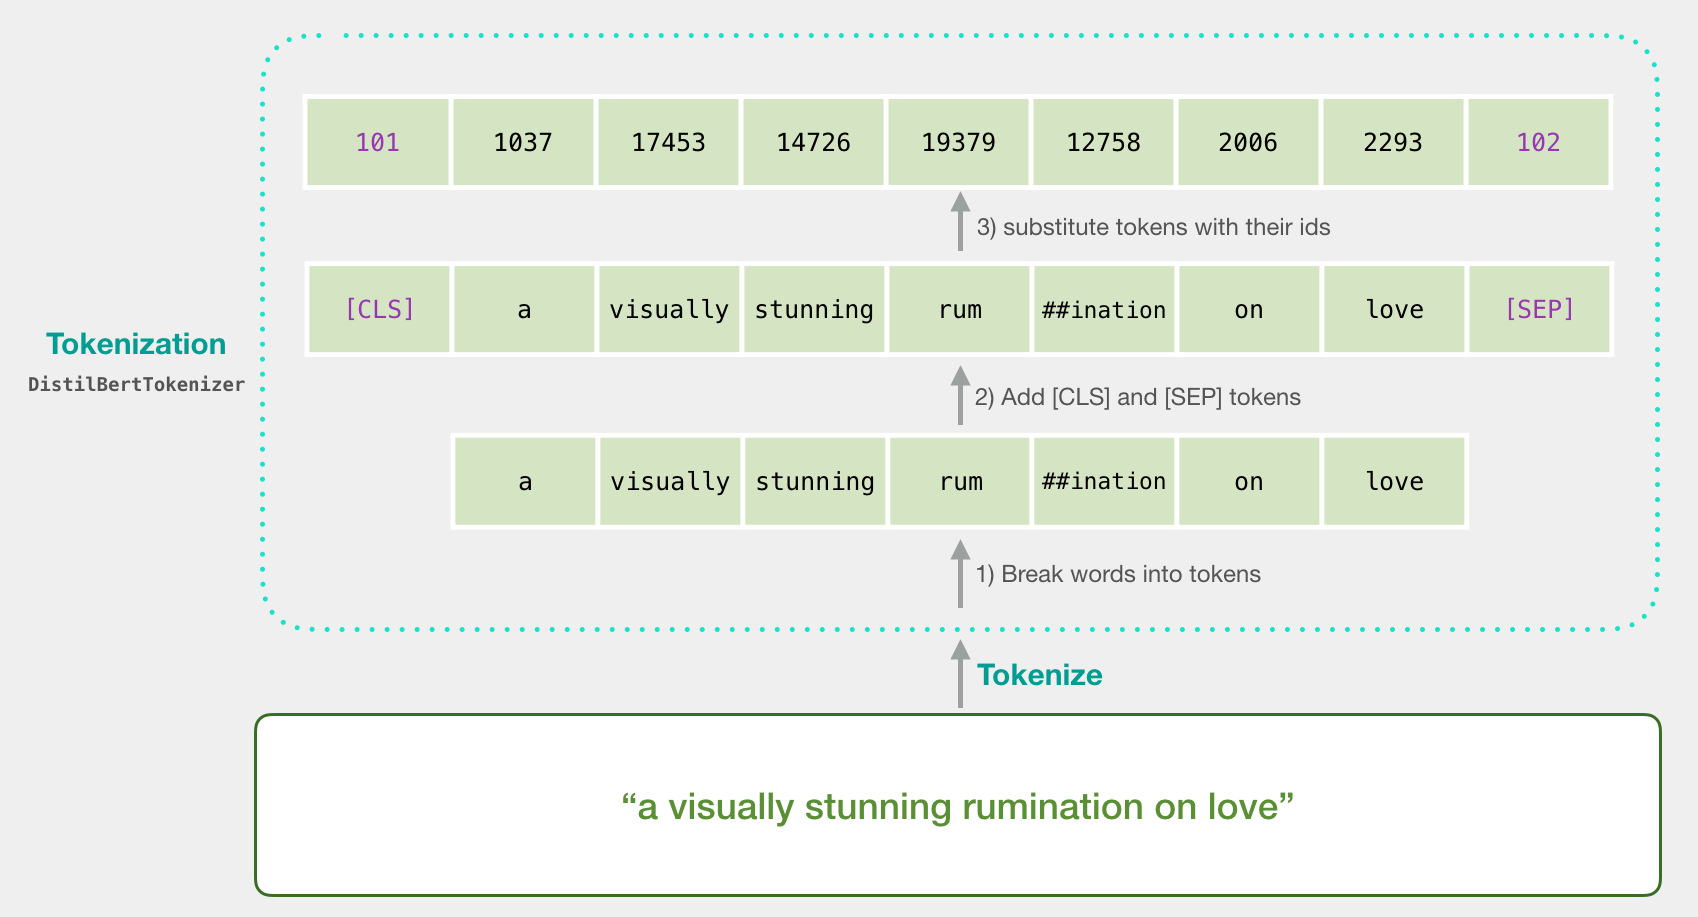

Our input sentence is now the proper shape to be passed to DistilBERT.

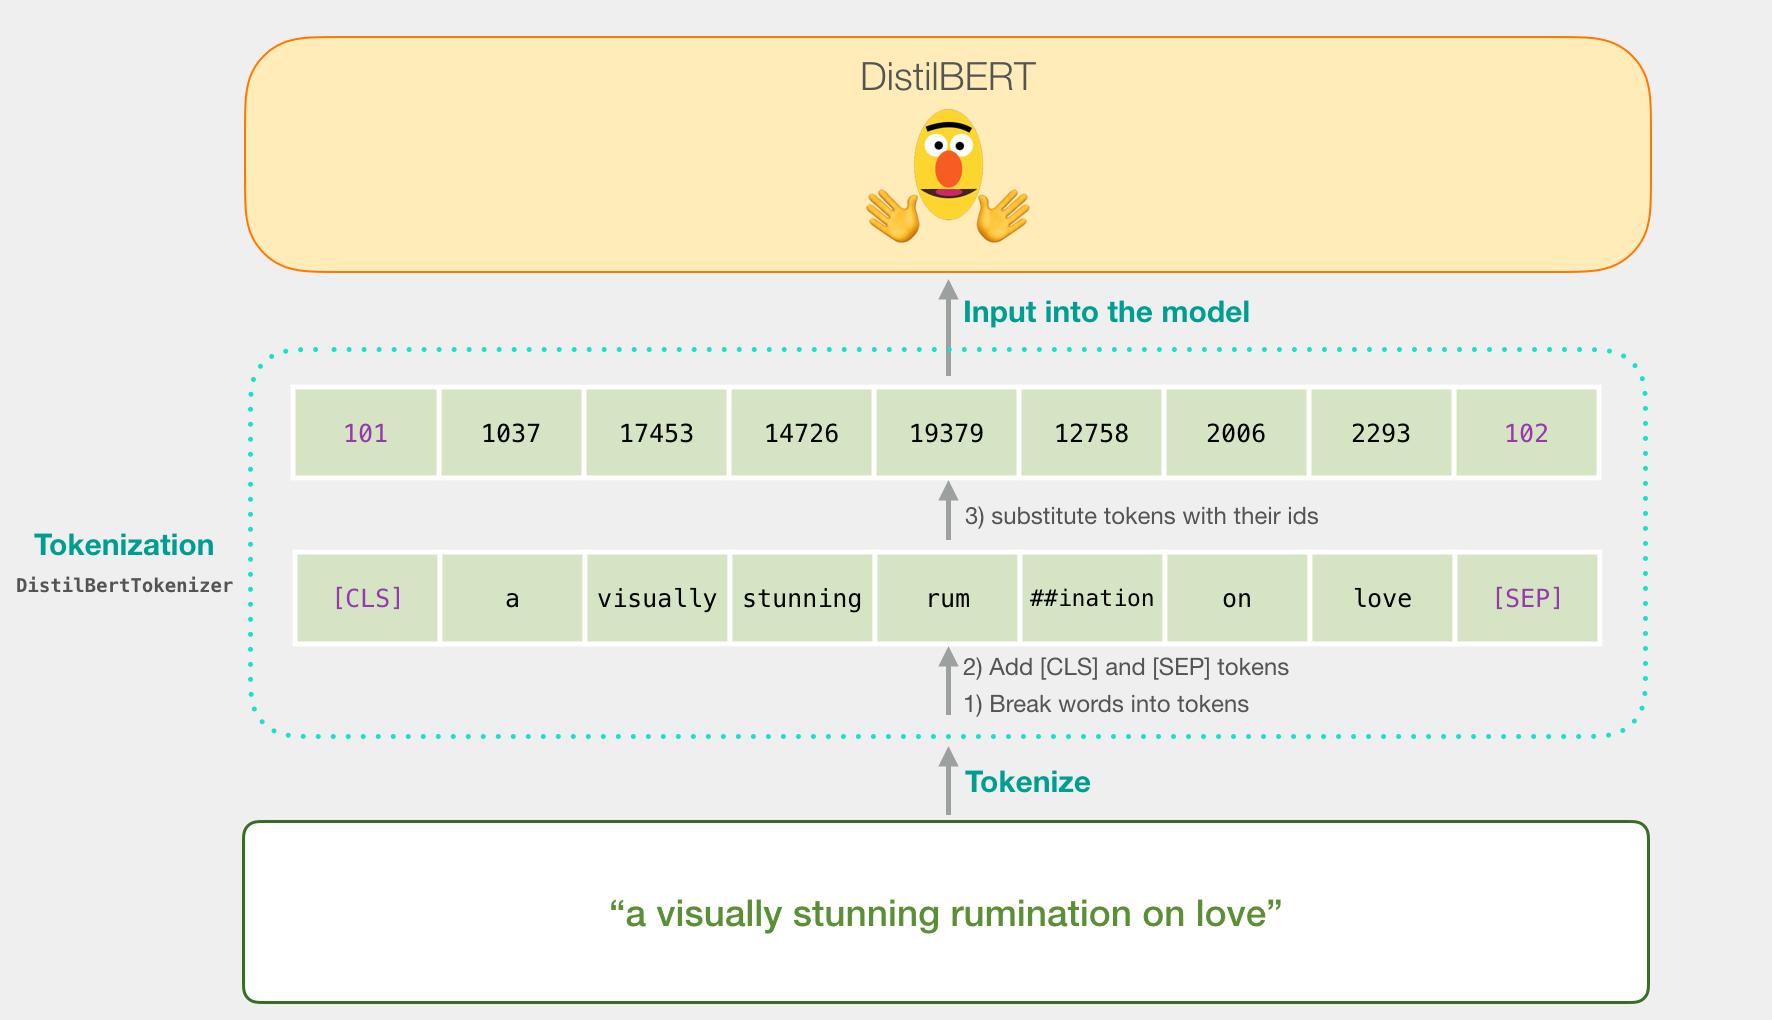

In [ ]:
tokenizer=tokenizer_class.from_pretrained(pretrained_weights)
model=model_class.from_pretrained(pretrained_weights)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
tokenize=df[0].apply(lambda x:tokenizer.encode(x,add_special_tokens=True))

In [ ]:
tokenize

0       [101, 1037, 18385, 1010, 6057, 1998, 2633, 182...
1       [101, 4593, 2128, 27241, 23931, 2013, 1996, 62...
2       [101, 2027, 3653, 23545, 2037, 4378, 24185, 10...
3       [101, 2023, 2003, 1037, 17453, 14726, 19379, 1...
4       [101, 5655, 6262, 1005, 1055, 12075, 2571, 376...
                              ...                        
1995    [101, 2205, 20857, 1998, 11865, 16643, 2135, 5...
1996    [101, 2009, 2515, 1050, 1005, 1056, 2147, 2004...
1997    [101, 2023, 2028, 8704, 2005, 1996, 11848, 199...
1998    [101, 1999, 1996, 2171, 1997, 2019, 9382, 1898...
1999    [101, 1996, 3185, 2003, 25757, 2011, 1037, 244...
Name: 0, Length: 2000, dtype: object

**Flowing Through DistilBERT**


---


Passing the input vector through DistilBERT works just like BERT. The output would be a vector for each input token. each vector is made up of 768 numbers (floats).

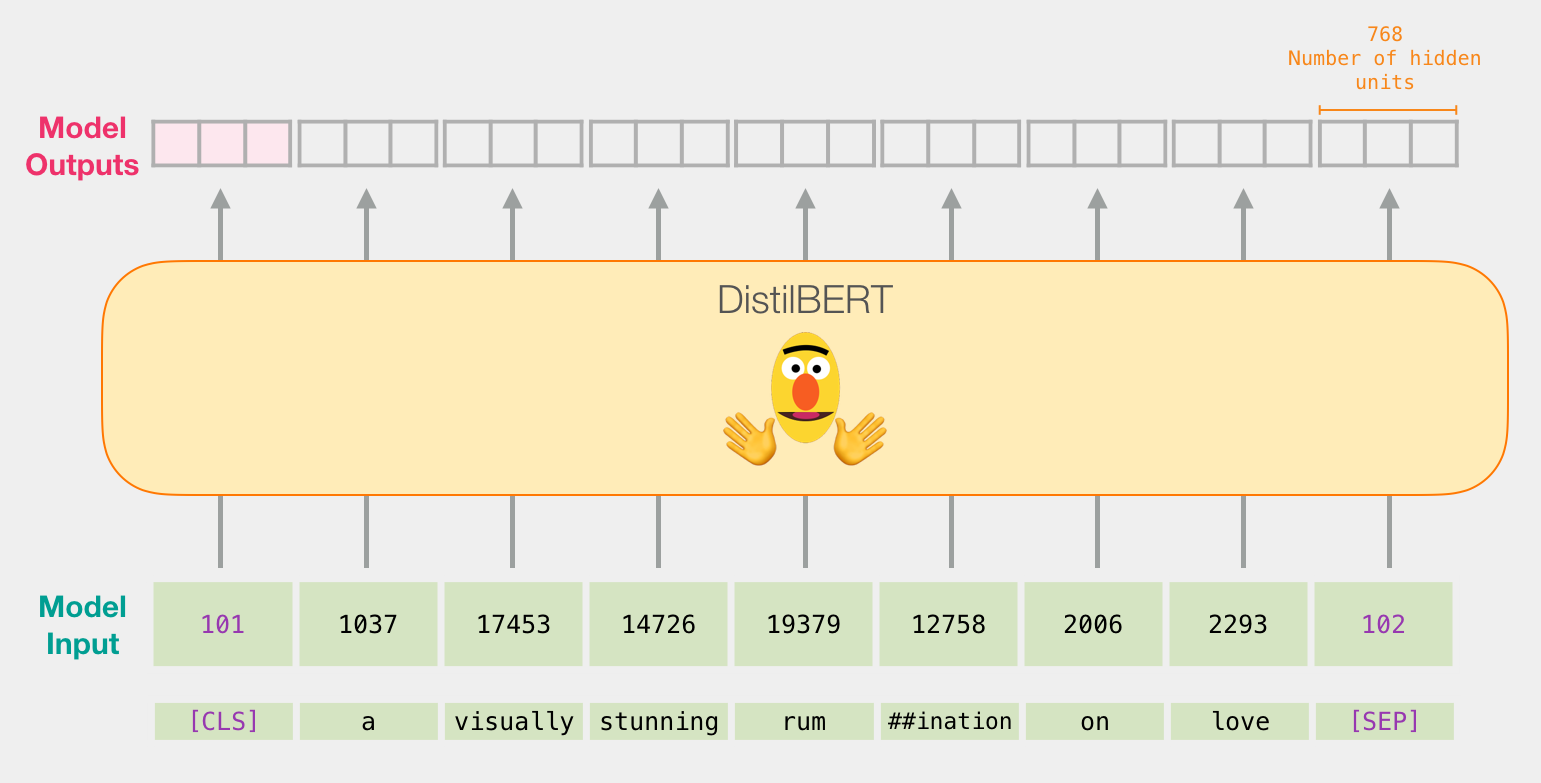

Because this is a sentence classification task, we ignore all except the first vector (the one associated with the [CLS] token). The one vector we pass as the input to the logistic regression model.


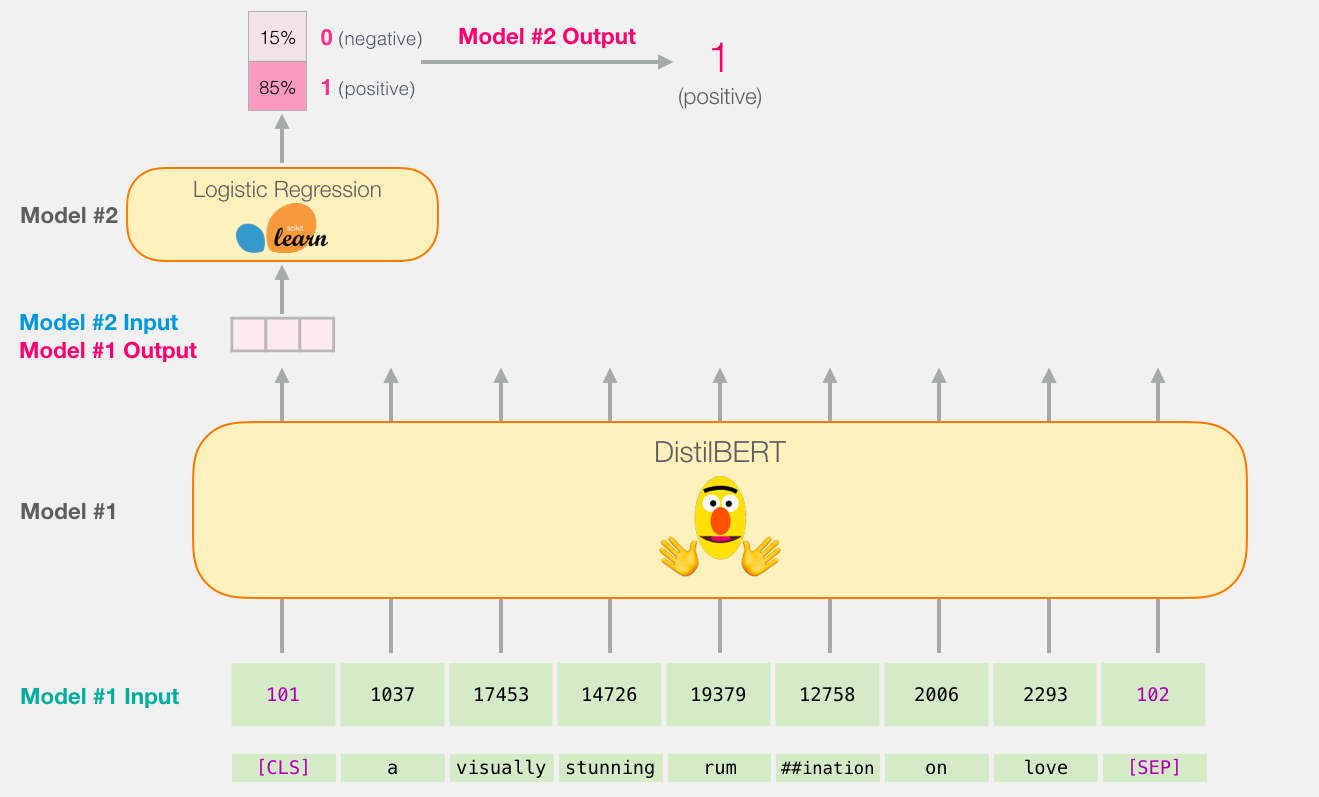

From here, it’s the logistic regression model’s job to classify this vector based on what it learned from its training phase. We can think of a prediction calculation as looking like this:

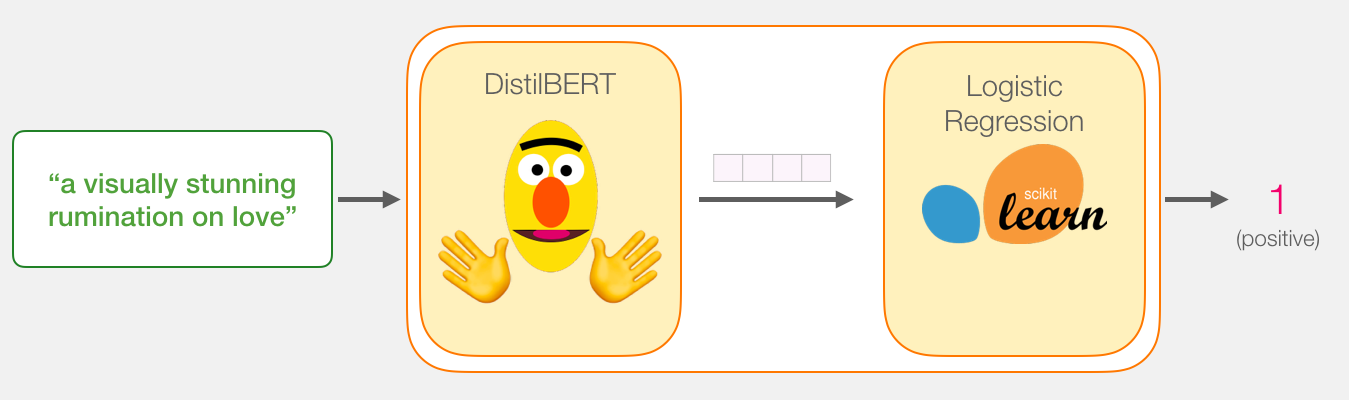

**Padding**


---



 Making all of same size

In [ ]:
maxlen=0
for i in tokenize.values:
  if len(i)>maxlen:
    maxlen=len(i)
padded=np.array([i+[0]*(maxlen-len(i)) for i in tokenize.values])

In [ ]:
padded

array([[  101,  1037, 18385, ...,     0,     0,     0],
       [  101,  4593,  2128, ...,     0,     0,     0],
       [  101,  2027,  3653, ...,     0,     0,     0],
       ...,
       [  101,  2023,  2028, ...,     0,     0,     0],
       [  101,  1999,  1996, ...,     0,     0,     0],
       [  101,  1996,  3185, ...,     0,     0,     0]])

**Masking**

---



To show the model to skip which are 0 from padded

In [ ]:
mask=np.where(padded!=0,1,0)
mask

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [ ]:
input_ids = torch.tensor(padded)  
mask = torch.tensor(mask)

**Processing with DistilBERT**


---


We now create an input tensor out of the padded token matrix, and send that to DistilBERT

After running this step, last_hidden_states holds the outputs of DistilBERT. It is a tuple with the shape (number of examples, max number of tokens in the sequence, number of hidden units in the DistilBERT model). In our case, this will be 2000 (since we only limited ourselves to 2000 examples), 66 (which is the number of tokens in the longest sequence from the 2000 examples), 768 (the number of hidden units in the DistilBERT model).
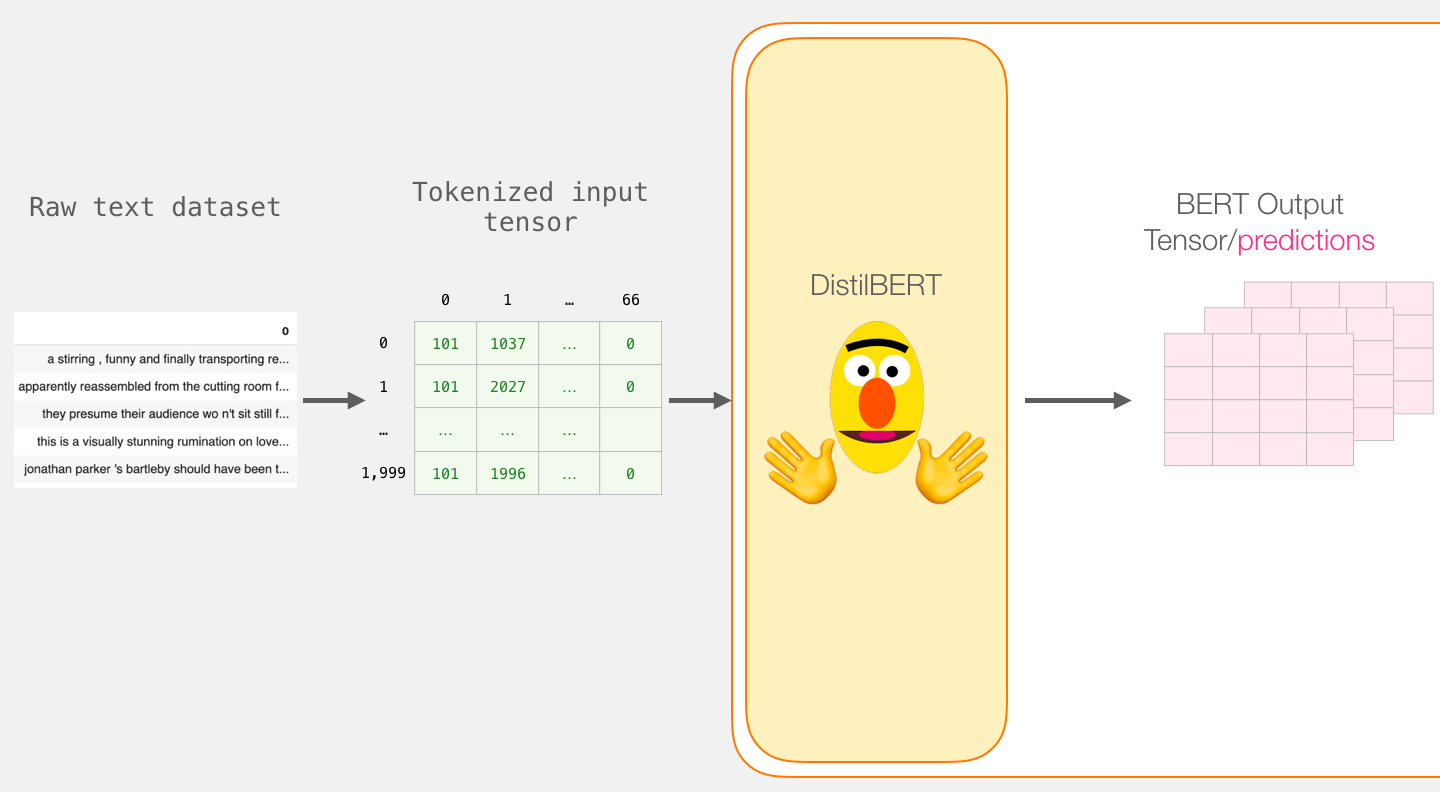

**Unpacking the BERT output tensor**

---



Let’s unpack this 3-d output tensor. We can first start by examining its dimensions:

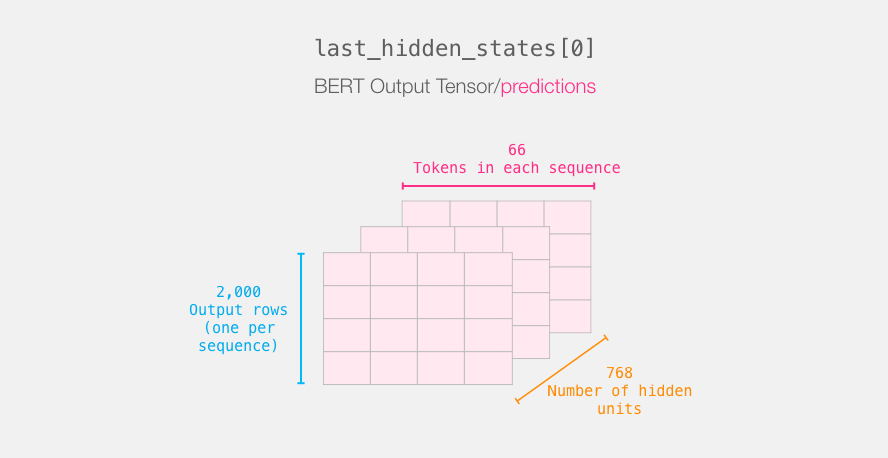

**Recapping a sentence’s journey**

Each row is associated with a sentence from our dataset. To recap the processing path of the first sentence, we can think of it as looking like this:

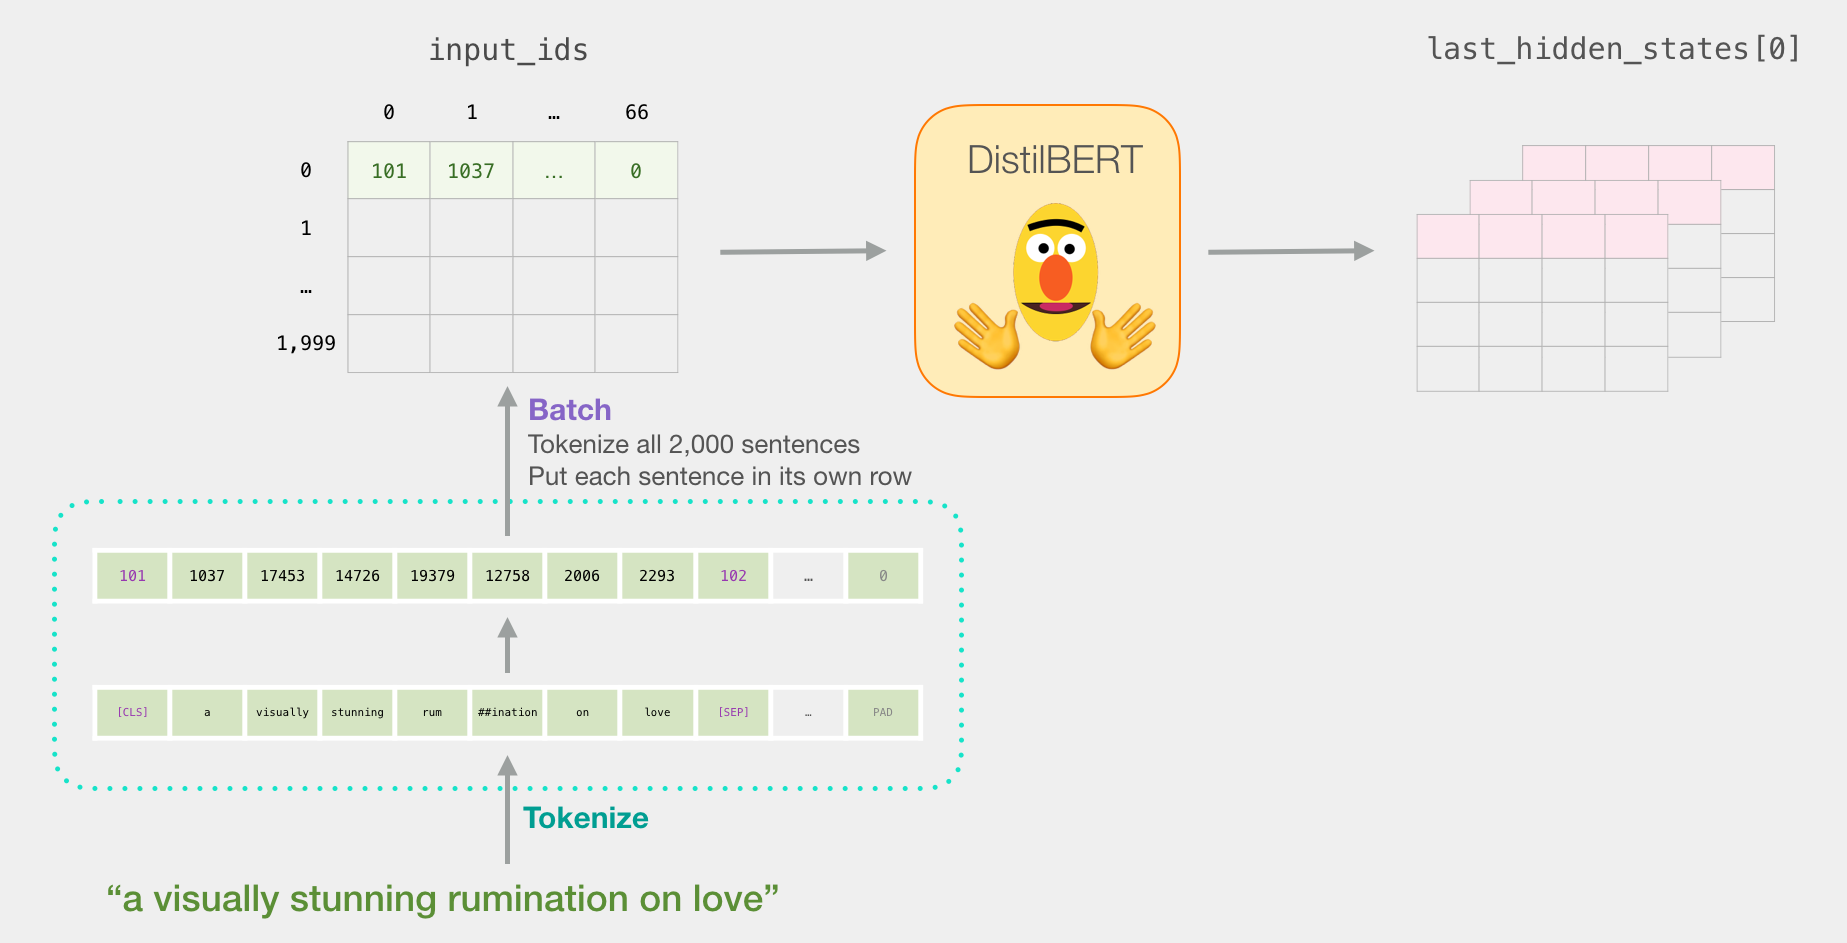

For sentence classification, we’re only only interested in BERT’s output for the [CLS] token, so we select that slice of the cube and discard everything else.

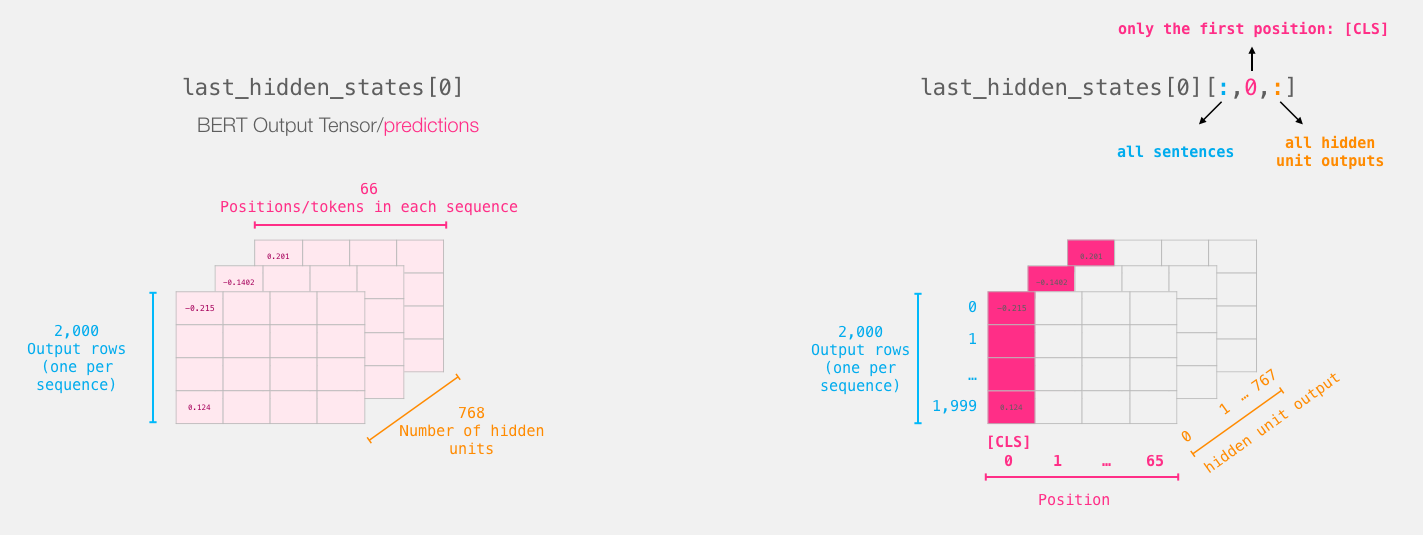



This is how we slice that 3d tensor to get the 2d tensor we’re interested in:

*Slice the output for the first position for all the sequences, take all hidden unit outputs*

features = last_hidden_states[0][:,0,:].numpy()

And now features is a 2d numpy array containing the sentence embeddings of all the sentences in our dataset.

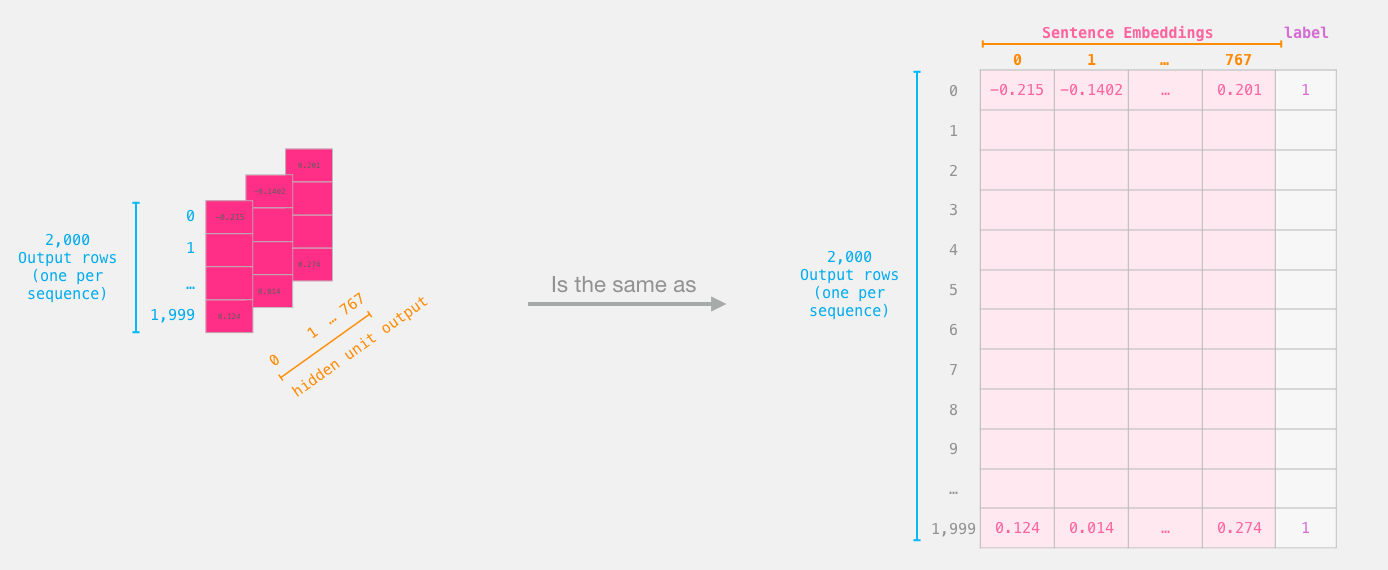


In [ ]:
with torch.no_grad():
  last_hidden_states=model(input_ids,attention_mask=mask)

In [ ]:
last_hidden_states[0][:,0,:]
#only CLS   token is needed which is present at the very starting of each last_hideen state

tensor([[-0.5566, -0.3313, -0.2228,  ..., -0.2279,  0.6319,  0.2431],
        [-0.2879, -0.1429, -0.0686,  ..., -0.3169,  0.1846,  0.3199],
        [-0.1865,  0.3023, -0.1851,  ..., -0.3349,  0.9849,  0.5298],
        ...,
        [-0.7284, -0.0908, -0.1227,  ...,  0.1130,  0.3828,  0.7715],
        [-0.0899,  0.4158, -0.1810,  ..., -0.2346,  0.3954,  0.5657],
        [ 0.2400,  0.2009,  0.1180,  ..., -0.1806,  0.3674,  0.1487]])

We'll save those in the features variable, as they'll serve as the features to our logitics regression model.

In [ ]:
features = last_hidden_states[0][:,0,:].numpy()

In [ ]:
labels=df[1]

In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

**We can also use grid search cv**

In [ ]:
parameters = {'C': np.linspace(0.0001, 100, 20)}
grid_search = GridSearchCV(LogisticRegression(), parameters)
grid_search.fit(train_features, train_labels)
print('best parameters: ', grid_search.best_params_)
print('best scrores: ', grid_search.best_score_)

best parameters:  {'C': 5.263252631578947}
best scrores:  0.8046666666666666


In [ ]:
p=LogisticRegression()
p.fit(train_features,train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
p.score(test_features, test_labels)

0.836

In [ ]:
y_pred=p.predict(test_features)


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(test_labels,y_pred))
print(classification_report(test_labels,y_pred))
print(confusion_matrix(test_labels,y_pred))

0.836
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       237
           1       0.84      0.85      0.85       263

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500

[[194  43]
 [ 39 224]]
